# Introduction:
In the realm of educational research, the adoption of effective study techniques plays a pivotal role in shaping students' understanding and retention of subject matter. Two widely recognized methods, namely active recall and spaced repetition, rely on the strategic deployment of reviewing material successively in intervals to enhance comprehension (Kwantlen Polytechnic University). This study focuses on the intricate domain of Electrical DC Machines and employs a standardized dataset, "User Knowledge Modeling," to delve into the relationship between study habits, repetition, and academic performance.
# Project Question:
The central question guiding this project is, "How do variables such as study time, repetition, and exam performance collectively contribute to a user's knowledge level in the specific domain of Electrical DC Machines?" This inquiry seeks to unravel the nuanced interplay between these key factors and the overall understanding of students in this specialized field.
# Dataset Description:
The dataset employed in this study, titled "User Knowledge Modeling," comprises 258 observations across six variables. These variables include the degree of study time for the main subject (STG), repetition levels (SCG), and exam performance for both the main subject and related topics (PEG). Additionally, the dataset captures the student's overall knowledge levels, categorized as very_low, Low, Middle, or High (UNS).
The data, sourced from a publicly available repository, underwent meticulous cleaning and restructuring in R to ensure a tidy and standardized format for analysis. This dataset serves as the empirical foundation for exploring the intricate relationships between study habits, repetition strategies, and academic outcomes in the context of Electrical DC Machines.
By examining these elements, we aim to provide valuable insights into effective learning strategies within this specialized field and contribute to the broader conversation on optimizing educational methodologies.


# Data & Methods:
Our first step was to import the data via reading a URL. To tidy the data, we renamed the columns to give them human readable and meaningful names. Next, we selected the relevant columns and changed knowledge level to a factor.

In [1]:
install.packages("GGally")
install.packages("ISLR")
install.packages("kknn")
install.packages("themis")
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)
library(GGally)
library(ISLR)
library(themis)
library(kknn)
library(shiny)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [3]:
user_knowledge_data <- read_csv("https://raw.githubusercontent.com/trinityma/dsci100project/main/DDData_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN%202%20(1).csv")

user_knowledge_data <- rename(user_knowledge_data,
       study_time = STG, 
       repetition = SCG, 
       study_time_related_subjects = STR,
       exam_performance_related_subjects = LPR , 
       exam_performance = PEG , 
       knowledge_level = UNS) |> 
    select(study_time:knowledge_level) |>
select(-study_time_related_subjects, -exam_performance_related_subjects) |>
mutate(knowledge_level = as.factor(knowledge_level))

h3("Table 1: ...")
user_knowledge_data

New names:
• `` -> `...7`
• `` -> `...8`
Rows: 258 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): UNS, Attribute Information:
dbl (5): STG, SCG, STR, LPR, PEG
lgl (2): ...7, ...8

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Shiny tags cannot be represented in plain text (need html)

study_time,repetition,exam_performance,knowledge_level
<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,very_low
0.08,0.08,0.90,High
0.06,0.06,0.33,Low
⋮,⋮,⋮,⋮
0.54,0.82,0.77,High
0.50,0.75,0.26,Middle
0.66,0.90,0.74,High


Summary Stats for our three variables are calculated including the average values for our 3 predictors and the number of individuals that belong to each category of user knowledge level. Our data has already been standardized with all predictors measured by a decimal value from 0 to 1.

In [4]:
user_knowledge_data_summary <- summarize (user_knowledge_data, mean_study_time = mean(study_time), mean_repetition = mean(repetition), mean_exam=mean(exam_performance))
user_knowledge_data_summary

uns_counts <- user_knowledge_data |>
                        group_by(knowledge_level) |>
                        summarize(count = n())

h3("Table 2: ...")
uns_counts

mean_study_time,mean_repetition,mean_exam
<dbl>,<dbl>,<dbl>
0.3711473,0.3556744,0.4585388


Shiny tags cannot be represented in plain text (need html)

knowledge_level,count
<fct>,<int>
High,63
Low,83
Middle,88
very_low,24


Visualization of data: Below are two graphs that illustrate the correlation between variables.

Shiny tags cannot be represented in plain text (need html)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


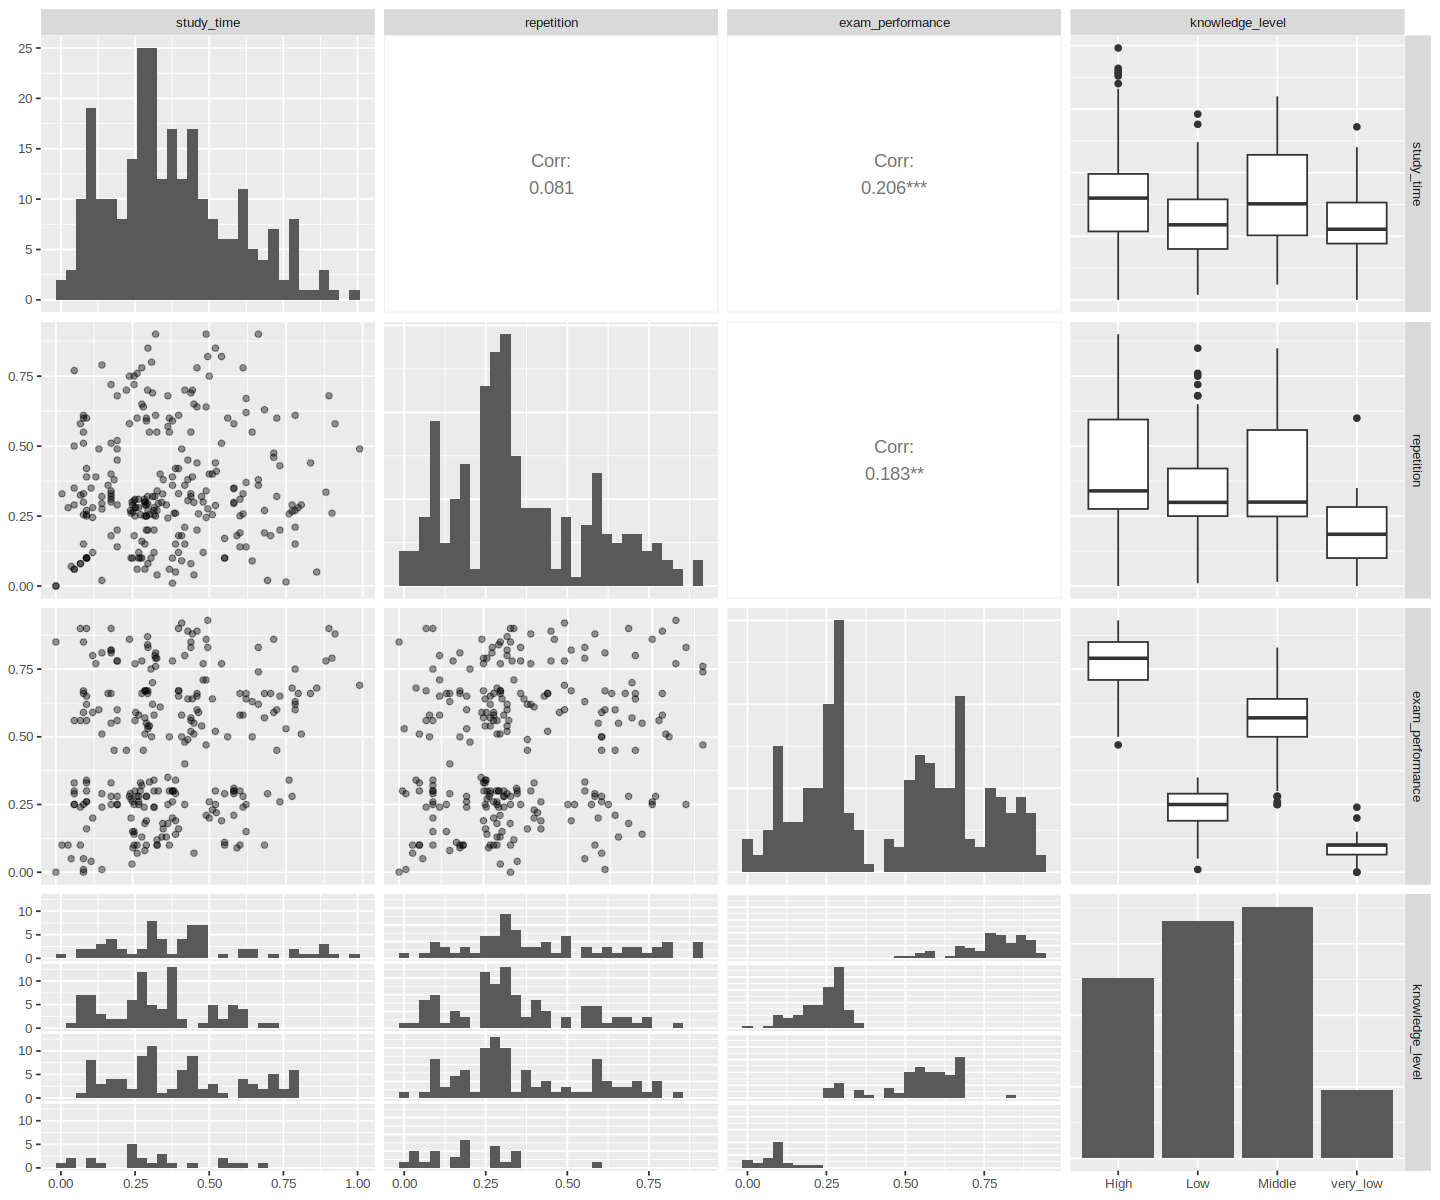

In [5]:
options(repr.plot.width = 12, repr.plot.height = 10)
 plot <- user_knowledge_data |> 
     ggpairs(
         lower = list(continuous = wrap('points', alpha = 0.4)),
         diag = list(continuous = "barDiag")
     ) +
     theme(text = element_text(size = 10))

h3("Plot 1: ...")
plot

Shiny tags cannot be represented in plain text (need html)

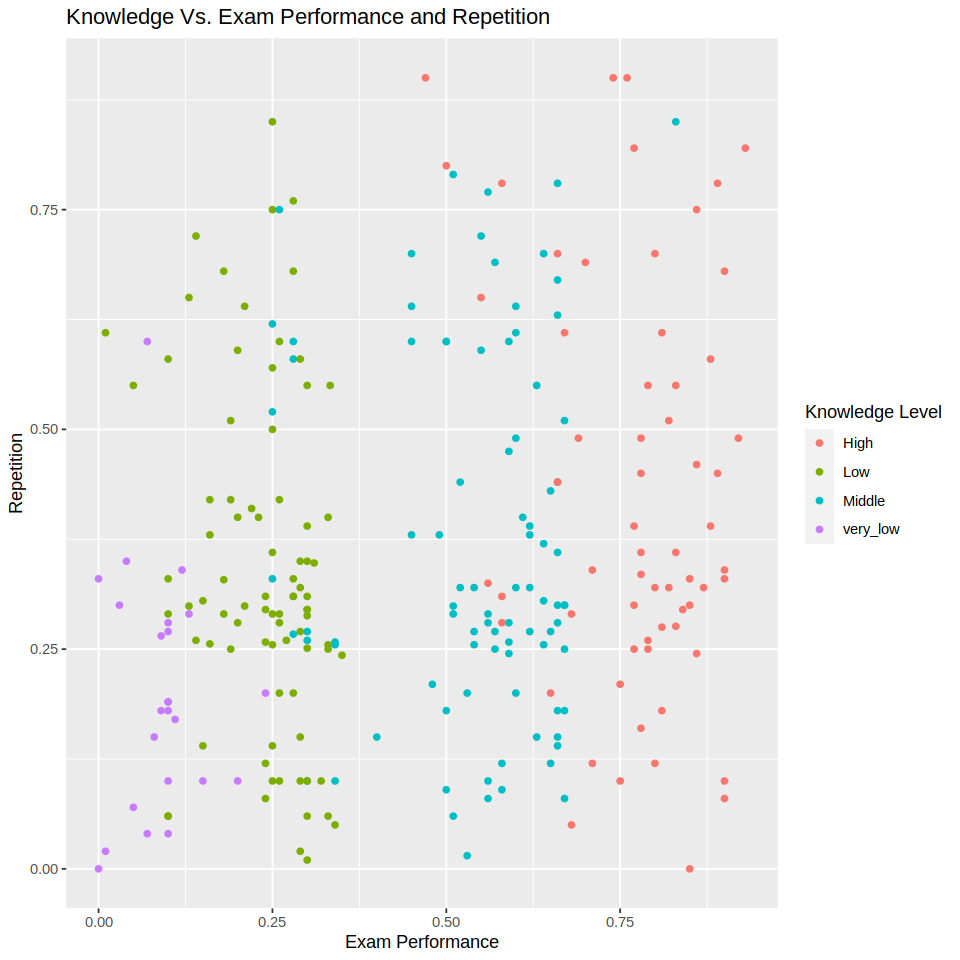

In [6]:
options(repr.plot.width = 8, repr.plot.height = 8)
scatter <- user_knowledge_data |> 
     ggplot(aes(x=exam_performance, y=repetition, color=knowledge_level))+
    geom_point()+
    labs(x = "Exam Performance", y = "Repetition", color = "Knowledge Level") +
    ggtitle("Knowledge Vs. Exam Performance and Repetition")
    
h3("Plot 2: ...")
scatter

Shiny tags cannot be represented in plain text (need html)

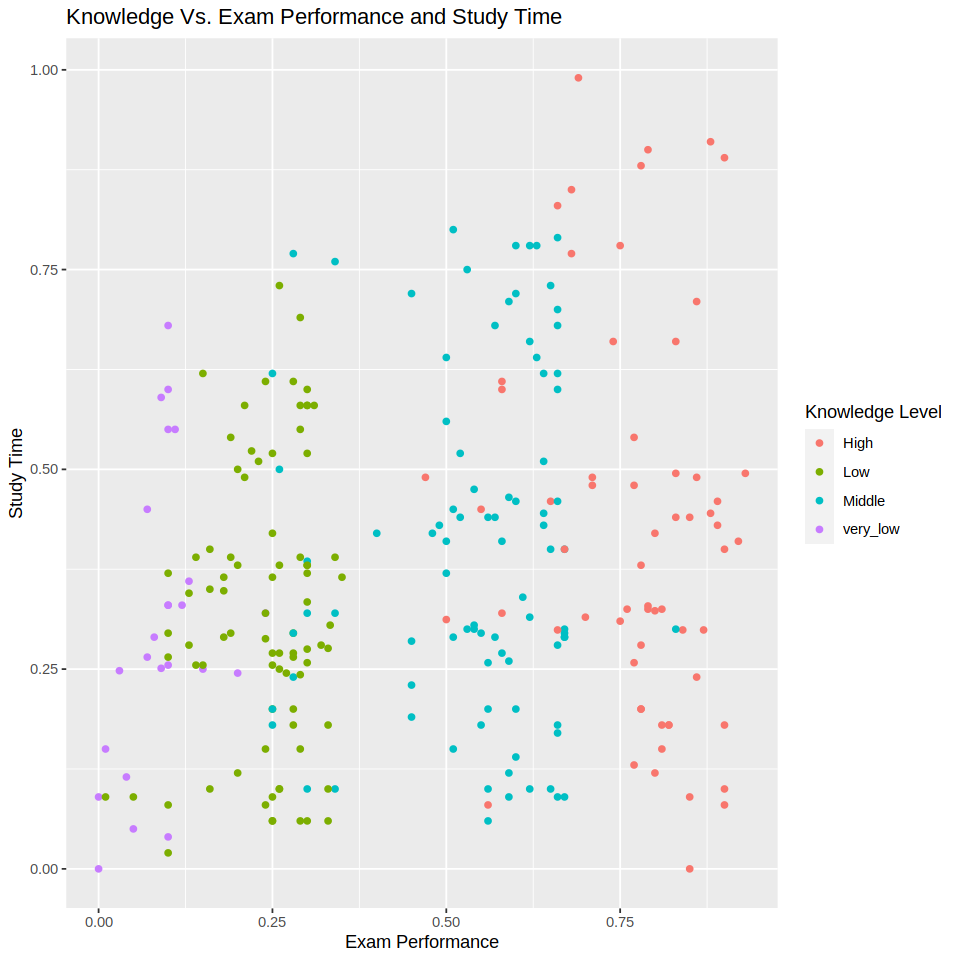

In [7]:
scatter2 <- user_knowledge_data |> 
     ggplot(aes(x=exam_performance, y=study_time, color=knowledge_level))+
    geom_point()+
    xlab("Exam Performance") +
    ylab("Study Time") +
    labs(x = "Exam Performance", y = "Study Time", color = "Knowledge Level") +
    ggtitle("Knowledge Vs. Exam Performance and Study Time")
    
h3("Plot 3: ...")
scatter2

While the levels of user knowledge seem to be vary closely correlated to exam performance, study time and repetition appear to have less of a direct correlation than what one might expect. In the category of users with a high knowledge level, there is a distribution of study times from 0.00 to 1.00. This is supported by the concept that study time must be properly spaced out to be efficient (Winerman, 2011). While some users appear to have spent little time studying, their knowledge level remains high.

In the subsequent step, our objective is to construct a model that facilitates the partitioning of the data set into training and test subsets, with the aim of creating a precise and predictive model. We use a 75-25 split as we split the user_knowledge_data into a training data set that will be used to train the KNN classification model and a testing data set that will be used to test the accuracy of the trained model with selected k values.

In [8]:
# 75% of the data will be in training dataset, and 25% will be in the testing dataset
# for the purpose of this project, we are using set.seed function to make sure same datasets will be generated each time we run the code.
set.seed(1)

user_knowledge_split <- initial_split(user_knowledge_data, prop = 0.75, strata = knowledge_level)
user_knowledge_training <- training(user_knowledge_split)
user_knowledge_testing <- testing(user_knowledge_split)

h3("Table 3: Training data set")
user_knowledge_training
h3("Table 4: Testing data set")
user_knowledge_testing

Shiny tags cannot be represented in plain text (need html)

study_time,repetition,exam_performance,knowledge_level
<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.0,very_low
0.08,0.08,0.9,High
0.12,0.12,0.8,High
⋮,⋮,⋮,⋮
0.56,0.60,0.50,Middle
0.78,0.61,0.60,Middle
0.50,0.75,0.26,Middle


Shiny tags cannot be represented in plain text (need html)

study_time,repetition,exam_performance,knowledge_level
<dbl>,<dbl>,<dbl>,<fct>
0.10,0.10,0.56,Middle
0.00,0.00,0.85,High
0.18,0.18,0.81,High
⋮,⋮,⋮,⋮
0.52,0.44,0.52,Middle
0.62,0.62,0.25,Middle
0.91,0.58,0.88,High


In [9]:
# check the range of values for each predictor columns to make sure that the data set is already scaled
column_min_max <- user_knowledge_data |>
                    select(-knowledge_level) |>
                    summarise(across(everything(), list(min = min, max = max)))

h3("Table 5: Min and max value in the data set for each columns")
column_min_max

Shiny tags cannot be represented in plain text (need html)

study_time_min,study_time_max,repetition_min,repetition_max,exam_performance_min,exam_performance_max
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.99,0,0.9,0,0.93


Create a recipe for our KNN classification model, we are not using step_scale and step_center functions here because the values for our parameters in our original data set are already scaled as shown in Table 5. However, base on the bar chart of the parameters, the original data set has a class imbalance problem. Therefore, we are using the step_upsample function from the "themis" library to rebalance the data by oversampling the rare classes (very_low, High, Low) with a ratio of 1, so we can give them more voting power in the KNN classification algorithm. 

In [10]:
# fix the class imbalance issue by oversampling the rare classes
set.seed(1)
user_knowledge_recipe <- recipe(knowledge_level ~ study_time+repetition+exam_performance, data = user_knowledge_training) |>
                            step_upsample(knowledge_level, over_ratio = 1.0)

user_knowledge_recipe

Recipe

Inputs:

      role #variables
   outcome          1
 predictor          3

Operations:

Up-sampling based on knowledge_level

Use vfold_cv function to split our user_knowledge_training data set into 5 folds. The function also ensures that training and validation subsets contains appropriate proportions of each class of observation.

In [11]:
set.seed(1)

user_knowledge_vfold <- vfold_cv(user_knowledge_training, v = 5, strata = "knowledge_level")

We use cross-validation to calculate an accuracy for each values of k in the range of 1:20 to see which k value yields the highest accuracy.

In [12]:
set.seed(1)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

knn_results <- workflow() |>
                add_recipe(user_knowledge_recipe) |>
                add_model(knn_tune) |>
                tune_grid(resamples = user_knowledge_vfold, grid = tibble(neighbors = 1:20)) |>
                collect_metrics()

h3("Table 6: Collected metrics from different k values from cross-validation")
knn_results

Shiny tags cannot be represented in plain text (need html)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.7397921,5,0.023891641,Preprocessor1_Model01
1,roc_auc,hand_till,0.8244444,5,0.009272711,Preprocessor1_Model01
2,accuracy,multiclass,0.7397921,5,0.023891641,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
19,roc_auc,hand_till,0.9188608,5,0.006215362,Preprocessor1_Model19
20,accuracy,multiclass,0.6828285,5,0.014126028,Preprocessor1_Model20
20,roc_auc,hand_till,0.9160633,5,0.003441110,Preprocessor1_Model20


Based on the result returned from the previous step, we graph a scatter plot with each k values on the x-axis and their corresponding accuracy on the y-axis to visualize which k value has the highest accuracy.

Shiny tags cannot be represented in plain text (need html)

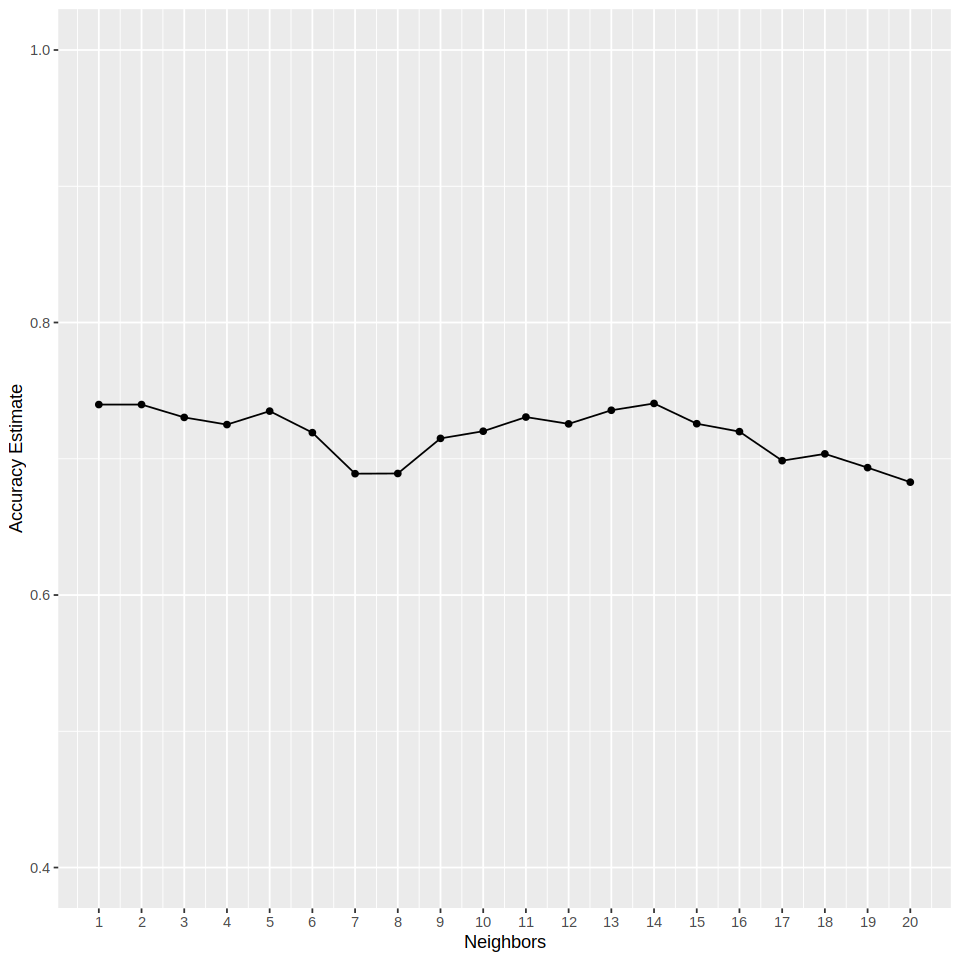

In [13]:
accuracies <- knn_results |>
                filter(.metric == "accuracy")
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 20, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

h3("Plot 4: Accuracy versus K values")
accuracy_versus_k

The graph shows that k = 14 have the highest accuracy. However, some of the k values also show good results and are close the the accuracy of k = 14. Therefore, we decide to build 3 models with k values of 2, 5, and 14, to see which k value yields the highest accuracy on the training data set. 

In [14]:
# using k = 2 on the training dataset to train the model
set.seed(1)

knn_spec_2 <- nearest_neighbor(weight_func = "rectangular", neighbor = 2) |>
            set_engine("kknn") |>
            set_mode("classification")

user_knowledge_fit_2 <- workflow() |>
                        add_recipe(user_knowledge_recipe) |>
                        add_model(knn_spec_2) |>
                        fit(data = user_knowledge_training)

user_knowledge_fit_2

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_upsample()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.1445312
Best kernel: rectangular
Best k: 2

In [15]:
set.seed(1)
user_knowledge_test2_predictions <- predict(user_knowledge_fit_2, user_knowledge_testing) |>
                                    bind_cols(user_knowledge_testing)

h3("Table 7: Predictions result on the testing data set with model of k = 2")
user_knowledge_test2_predictions

Shiny tags cannot be represented in plain text (need html)

.pred_class,study_time,repetition,exam_performance,knowledge_level
<fct>,<dbl>,<dbl>,<dbl>,<fct>
Middle,0.10,0.10,0.56,Middle
High,0.00,0.00,0.85,High
High,0.18,0.18,0.81,High
⋮,⋮,⋮,⋮,⋮
Middle,0.52,0.44,0.52,Middle
Low,0.62,0.62,0.25,Middle
High,0.91,0.58,0.88,High


In [16]:
# find the accuracy on the training data set with k = 2
user_knowledge_predictions2_accuracy <- metrics(user_knowledge_test2_predictions, truth = knowledge_level, estimate = .pred_class)

h3("Table 8: Accuracy on the training data set from the model of k = 2")
user_knowledge_predictions2_accuracy

Shiny tags cannot be represented in plain text (need html)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7424242
kap,multiclass,0.6262492


In [17]:
# using k = 5 on the training dataset to train the model
set.seed(1)
knn_spec_5 <- nearest_neighbor(weight_func = "rectangular", neighbor = 5) |>
            set_engine("kknn") |>
            set_mode("classification")

user_knowledge_fit_5 <- workflow() |>
                        add_recipe(user_knowledge_recipe) |>
                        add_model(knn_spec_5) |>
                        fit(data = user_knowledge_training)

user_knowledge_fit_5

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_upsample()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(5,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2382812
Best kernel: rectangular
Best k: 5

In [18]:
set.seed(1)
user_knowledge_test5_predictions <- predict(user_knowledge_fit_5, user_knowledge_testing) |>
                                    bind_cols(user_knowledge_testing)

h3("Table 9: Predictions result on the testing data set with model of k = 5")
user_knowledge_test5_predictions

Shiny tags cannot be represented in plain text (need html)

.pred_class,study_time,repetition,exam_performance,knowledge_level
<fct>,<dbl>,<dbl>,<dbl>,<fct>
Middle,0.10,0.10,0.56,Middle
Middle,0.00,0.00,0.85,High
High,0.18,0.18,0.81,High
⋮,⋮,⋮,⋮,⋮
Middle,0.52,0.44,0.52,Middle
Middle,0.62,0.62,0.25,Middle
Middle,0.91,0.58,0.88,High


In [19]:
# find the accuracy on the training data set with k = 5
user_knowledge_predictions5_accuracy <- metrics(user_knowledge_test5_predictions, truth = knowledge_level, estimate = .pred_class)

h3("Table 10: Accuracy on the training data set from the model of k = 5")
user_knowledge_predictions5_accuracy

Shiny tags cannot be represented in plain text (need html)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.7121212
kap,multiclass,0.5939119


In [20]:
# using k = 14 on the training dataset to train the model
set.seed(1)
knn_spec_14 <- nearest_neighbor(weight_func = "rectangular", neighbor = 14) |>
            set_engine("kknn") |>
            set_mode("classification")

user_knowledge_fit_14 <- workflow() |>
                        add_recipe(user_knowledge_recipe) |>
                        add_model(knn_spec_14) |>
                        fit(data = user_knowledge_training)

user_knowledge_fit_14

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
1 Recipe Step

• step_upsample()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(14,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.234375
Best kernel: rectangular
Best k: 14

In [21]:
set.seed(1)
user_knowledge_test14_predictions <- predict(user_knowledge_fit_14, user_knowledge_testing) |>
                                    bind_cols(user_knowledge_testing)

h3("Table 11: Predictions result on the testing data set with model of k = 14")
user_knowledge_test14_predictions

Shiny tags cannot be represented in plain text (need html)

.pred_class,study_time,repetition,exam_performance,knowledge_level
<fct>,<dbl>,<dbl>,<dbl>,<fct>
Middle,0.10,0.10,0.56,Middle
High,0.00,0.00,0.85,High
High,0.18,0.18,0.81,High
⋮,⋮,⋮,⋮,⋮
High,0.52,0.44,0.52,Middle
Low,0.62,0.62,0.25,Middle
High,0.91,0.58,0.88,High


In [22]:
# find the accuracy on the training data set with k = 14
user_knowledge_predictions14_accuracy <- metrics(user_knowledge_test14_predictions, truth = knowledge_level, estimate = .pred_class)

h3("Table 12: Accuracy on the training data set from the model of k = 14")
user_knowledge_predictions14_accuracy

Shiny tags cannot be represented in plain text (need html)

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.6969697
kap,multiclass,0.5758355


After finding the accuracy for each k values, we can see that the model with k = 2 has the highest accuracy of 0.7424242. However, we can also use k = 5 since it has an accuracy of 0.7121212 (greater than 70%) and it is less prone to overfit the data than k = 2.

Create confusion matrices with k = 2 and k = 5 respectively.

In [23]:
user_knowledge_mat2 <- conf_mat(user_knowledge_test2_predictions, truth = knowledge_level, estimate = .pred_class)

h3("Table 13: Confusion matrix for k = 2")
user_knowledge_mat2

Shiny tags cannot be represented in plain text (need html)

          Truth
Prediction High Low Middle very_low
  High       12   0      2        0
  Low         0  15      2        2
  Middle      4   5     20        0
  very_low    0   2      0        2

In [24]:
user_knowledge_mat5 <- conf_mat(user_knowledge_test5_predictions, truth = knowledge_level, estimate = .pred_class)

h3("Table 14: Confusion matrix for k = 5")
user_knowledge_mat5

Shiny tags cannot be represented in plain text (need html)

          Truth
Prediction High Low Middle very_low
  High       10   0      2        0
  Low         0  16      3        1
  Middle      6   1     18        0
  very_low    0   5      1        3

# Discussion: 
Therefore to summarize, scatter plots and pair plots were created to visualize the relationships between study time, repetition, exam performance, and knowledge levels. While knowledge levels seem closely correlated with exam performance, study time and repetition show less direct correlation.
The mean study time is approximately 0.37, mean repetition is about 0.36, and mean exam performance is around 0.46. The dataset is balanced, with counts of individuals in each knowledge level category: High (63), Low (83), Middle (88), and very_low (24).After we saw all this, we decided to creat our own model, The dataset was split into training (75%) and testing (25%) subsets.
A k-Nearest Neighbors (knn) classification model was trained using the training set to predict knowledge levels based on study time, repetition, and exam performance.
The model achieved an accuracy of approximately 75.4% on the test set.
The k-Nearest Neighbors model, with optimal tuning, demonstrates a reasonable ability to predict user knowledge levels in Electrical DC Machines based on study time, repetition, and exam performance.
 the project provides insights into the relationships between study habits, repetition, exam performance, and user knowledge levels in the specific domain of Electrical DC Machines, offering a foundation for future research and educational strategies.


Expectations vs. Findings:

The finding that knowledge levels are closely correlated with exam performance aligns with expectations, as exams are typically designed to assess understanding and retention.
The less direct correlation between study time, repetition, and knowledge levels may be surprising but is consistent with the idea that the effectiveness of study habits depends on various factors, including how time is allocated and how repetition is implemented.
The findings suggest that traditional metrics like study time may not be the sole indicators of academic success. Educators may need to consider the quality of study sessions and the strategic use of repetition.

Future Questions and Research Directions:

How can the Study Environment impact knowledge levels? 
One can further explore how the study environment, including tools and resources, influences the relationship between study habits and knowledge levels.

Long-Term Effects: Examine the long-term effects of study habits on knowledge retention and academic performance to understand the sustainability of learning strategies.

# References:
  Kwantlen Polytechnic University. Spaced Repetition. Accessed 8 Dec. 2023.
  
  Winerman, Lea. “Study Smart.” American Psychological Association, 1 Nov. 2011, https://www.apa.org/gradpsych/2011/11/study-smart.
